# predictor si el agua es potable o no

In [210]:
# importo pandas para cargar y visualizar los datos y numpy por si se me ofrece hacer calculos de matrices
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [211]:
data = pd.read_csv('water_potability.csv')
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# antes que nada voy hacer una descripcion de cada una de las columnas del dataset

# Ph = valor de pH (de 1. agua (0 a 14)):

El PH es un parámetro importante en la evaluación del equilibrio ácido-base del agua. También es el indicador de la condición ácida o alcalina del estado del agua. La OMS ha recomendado el límite máximo permisible de pH de 6,5 a 8,5. Los rangos de investigación actuales fueron de 6,52 a 6,83, que se encuentran en el rango de los estándares de la OMS.

# Hardness = Dureza (Capacidad del agua para precipitar jabón en mg / L):

La dureza es causada principalmente por sales de calcio y magnesio. Estas sales se disuelven a partir de depósitos geológicos a través de los cuales viaja el agua. El tiempo que el agua está en contacto con el material que produce dureza ayuda a determinar cuánta dureza hay en el agua cruda. La dureza se definió originalmente como la capacidad del agua para precipitar el jabón causado por el calcio y el magnesio.

# Solids = Sólidos (sólidos disueltos totales en ppm):

El agua tiene la capacidad de disolver una amplia gama de minerales o sales inorgánicos y algunos orgánicos, como potasio, calcio, sodio, bicarbonatos, cloruros, magnesio, sulfatos, etc. Estos minerales producen un sabor no deseado y un color diluido en apariencia de agua. Este es el parámetro importante para el uso del agua. El agua con alto valor de TDS indica que el agua está altamente mineralizada. El límite deseable de TDS es de 500 mg / ly el límite máximo es de 1000 mg / l que se prescribe para beber.

# Chloramines = Cloraminas (Cantidad de cloraminas en ppm):

El cloro y la cloramina son los principales desinfectantes que se utilizan en los sistemas públicos de agua. Las cloraminas se forman con mayor frecuencia cuando se agrega amoníaco al cloro para tratar el agua potable. Los niveles de cloro de hasta 4 miligramos por litro (mg / L o 4 partes por millón (ppm)) se consideran seguros en el agua potable.

# Sulfate = Sulfato (Cantidad de sulfatos disueltos en mg / L):

Los sulfatos son sustancias naturales que se encuentran en minerales, suelo y rocas. Están presentes en el aire ambiente, el agua subterránea, las plantas y los alimentos. El principal uso comercial del sulfato es en la industria química. La concentración de sulfato en el agua de mar es de aproximadamente 2700 miligramos por litro (mg / L). Varía de 3 a 30 mg / L en la mayoría de los suministros de agua dulce, aunque se encuentran concentraciones mucho más altas (1000 mg / L) en algunas ubicaciones geográficas.

# Conductivity = Conductividad (conductividad eléctrica del agua en μS / cm):

El agua pura no es un buen conductor de corriente eléctrica, más bien es un buen aislante. El aumento de la concentración de iones mejora la conductividad eléctrica del agua. Generalmente, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (EC) en realidad mide el proceso iónico de una solución que le permite transmitir corriente. Según los estándares de la OMS, el valor de CE no debe exceder los 400 μS / cm.

# Organic_carbon = Carbono orgánico (Cantidad de carbono orgánico en ppm):

El carbono orgánico total (TOC) en las fuentes de agua proviene de la materia orgánica natural en descomposición (NOM), así como de fuentes sintéticas. TOC es una medida de la cantidad total de carbono en compuestos orgánicos en agua pura. Según la EPA de EE. UU. <2 mg / L como TOC en agua tratada / potable y <4 mg / Lit en el agua de origen que se utiliza para el tratamiento.

# Trihalomethanes = Trihalometanos (Cantidad de Trihalometanos en μg / L):

Los THM son sustancias químicas que se pueden encontrar en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de material orgánico en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Los niveles de THM de hasta 80 ppm se consideran seguros en el agua potable.

# Turbidity = Turbidez (Medida de la propiedad de emisión de luz del agua NTU):

La turbidez del agua depende de la cantidad de materia sólida presente en estado suspendido. Es una medida de las propiedades emisoras de luz del agua y la prueba se utiliza para indicar la calidad de la descarga de desechos con respecto a la materia coloidal. El valor medio de turbidez obtenido para Wondo Genet Campus (0,98 NTU) es inferior al valor recomendado por la OMS de 5,00 NTU.

# Potability = Potabilidad:

Indica si el agua es segura para el consumo humano, donde 1 significa potable y 0 significa no potable.

In [212]:
# verifico que tipos de datos tiene el dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


el dataset tiene datos faltantes y la columna 'Potability' que es la variable objetivo tiene datos de tipo enteros
para entrenar un modelo de prediccion esta columna debe de tener dato de tipo category

In [213]:
data['Potability'].unique()

array([0, 1])

In [214]:
# modifico la columna 'Potability' por un tipo de dato categorico
data['Potability']=data['Potability'].astype('category')
data.dtypes

ph                  float64
Hardness            float64
Solids              float64
Chloramines         float64
Sulfate             float64
Conductivity        float64
Organic_carbon      float64
Trihalomethanes     float64
Turbidity           float64
Potability         category
dtype: object

# no se puede hacer un analisis estadistico ni entrenar un modelo de predicción con valores faltantes

In [215]:
# verifico donde y cuantos valores faltantes hay
data.notnull().apply(pd.Series.value_counts)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
False,491,NaN,NaN,NaN,781,NaN,NaN,162,NaN,NaN
True,2785,3276.0,3276.0,3276.0,2495,3276.0,3276.0,3114,3276.0,3276.0


# se puede ver que el dataset tiene muchos valores nulos en las columnas (ph, Sulfate, Trihalomethanes)

In [216]:
# ahora verifico si hay valores en 0

# verifico donde y cuantos valores tienen cero 0 aparte de la columna Potability
(data != 0).apply(pd.Series.value_counts)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
True,3275,3276.0,3276.0,3276.0,3276.0,3276.0,3276.0,3276.0,3276.0,1278


por lo general cuando hay valores nulos se recomienda rellenar estos datos con la media o promedio de los datos
o con la mediana.

en este caso voy a intentar rellenar los valores nulos con la media o el promedio pero para rellenar estos datos nulos
tengo que validar si la media es confiable, esto se le llama en estadistica coeficiente de variación la formula
es la siguiente.

coeficiente =  (desviación_estandar/media)*100

SI EL COEFICIENTE SUPERA EL 25% NO ES CONFIABLE RELLENAR LOS DATOS NULOS CON ESTE ESTADISTICO

In [217]:
nulls = data[['ph', 'Sulfate', 'Trihalomethanes']]

In [218]:
(data['ph'].std()/data['ph'].mean())*100 # --> coeficiente para la columna ph

22.516110554342987

In [219]:
(data['Sulfate'].std()/data['Sulfate'].mean())*100 # --> coeficiente para la columna Sulfate

12.408581857623904

In [220]:
(data['Trihalomethanes'].std()/data['Trihalomethanes'].mean())*100 # --> coeficiente para la columna Sulfate

24.36131251361677

nunguno de los coeficientes supera el 25% esto quiere decir que es confiable rellenar los nulos con la media

In [221]:
# remplazo los valores nulos con la media

data['ph']=data['ph'].fillna(data.groupby(['Potability'])['ph'].transform('mean'))
data['Sulfate']=data['Sulfate'].fillna(data.groupby(['Potability'])['Sulfate'].transform('mean'))
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [222]:
# valido que el remplazo de los valores nulos sea exitoso

data.notnull().apply(pd.Series.value_counts)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
True,3276,3276,3276,3276,3276,3276,3276,3276,3276,3276


# hora que no hay valores faltantes se puede hacer un analisis datos

In [223]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# análisis estadístico

In [224]:
data.describe().T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,3276.000000,7.080855,1.469958,0.000000,6.277673,7.085378,7.870050,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.000000,333.785123,36.145701,129.000000,317.094638,334.564290,350.385756,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.000000,66.395671,15.769901,0.738000,56.647656,66.303555,76.666609,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


la columna Solids (solidos) es la que tiene los estadisticos mas altos esto quiere decir que los valores de esta
columna son los mas dispersos del dataset

In [225]:
# Potabilidad es 1 - significa bueno para humanos
data[data['Potability']==1].describe().T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1278.000000,7.073783,1.343952,0.227499,6.351824,7.073783,7.780068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,1278.000000,332.566990,41.865385,129.000000,313.052947,332.566990,354.807924,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1278.000000,66.539684,15.971941,8.175876,56.911186,66.539684,77.067457,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [226]:
# La potabilidad es 0 - significa que no es bueno para humanos
data[data['Potability']==0].describe().T.style.background_gradient(cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1998.000000,7.085378,1.545489,0.000000,6.224046,7.085378,7.940697,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1998.000000,334.564290,31.941870,203.444521,319.354715,334.564290,348.316746,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1998.000000,66.303555,15.642622,0.738000,56.441831,66.303555,76.518849,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


comparanado las tablas de agua potable y no potable se puede notar que los estadisticos de ambas tablas son muy similares esto puede afectar un poco la calidad del modelo de predicción ya que es mas dificil diferenciar que variables influyen en la calidad del agua.

<AxesSubplot:xlabel='Potability', ylabel='count'>

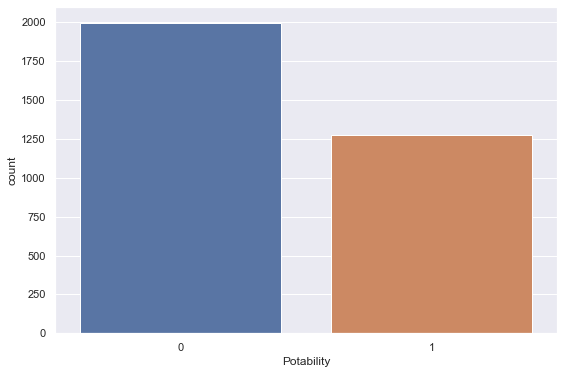

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(9,6)})
sns.countplot(data['Potability'])

en el histograma se puede ver que en el dataset la mayoria de los datos son de agua no potable

# verifico los valores atipicos de cada una de las columnas con respecto a la Potabilidad del agua

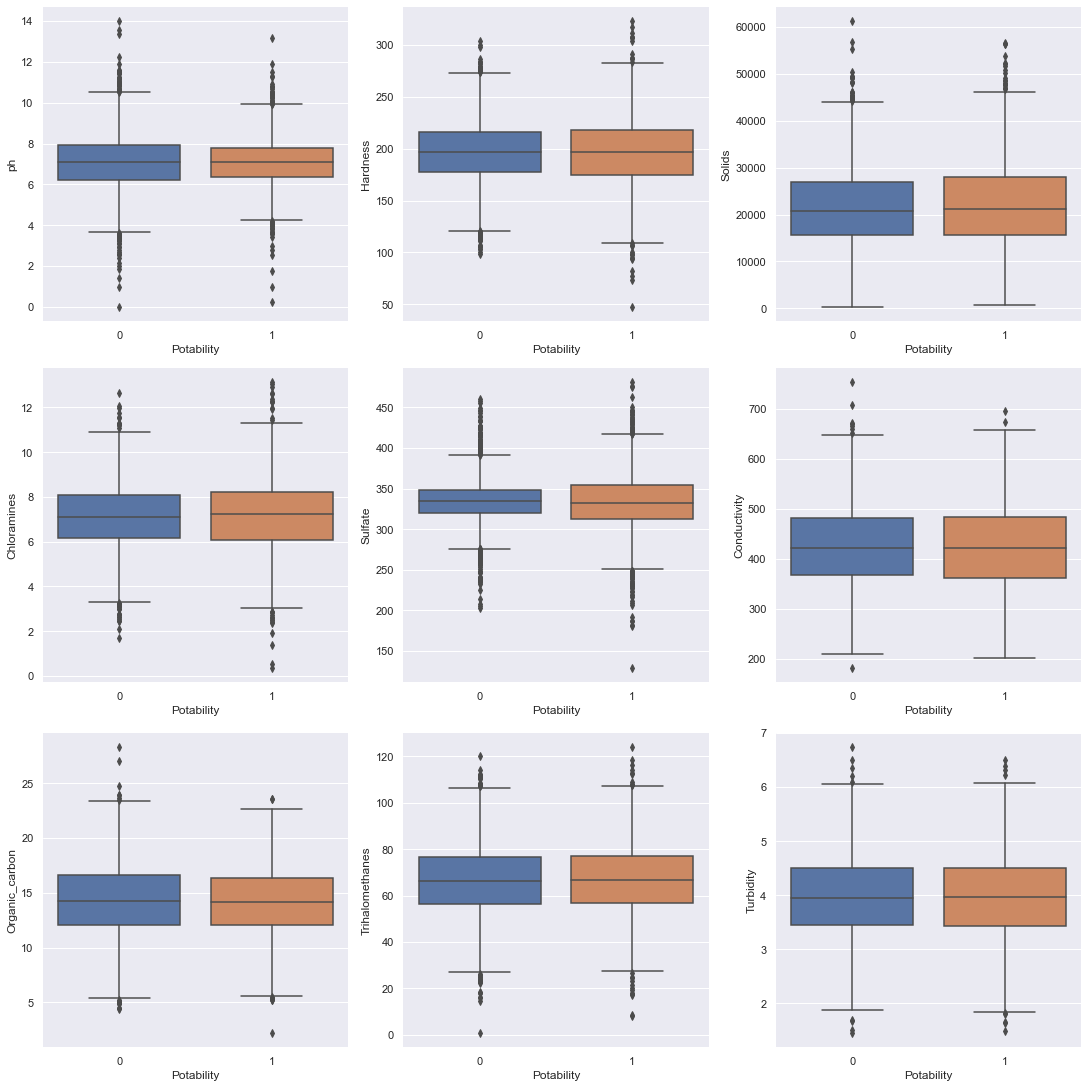

In [228]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
int_cols = data.select_dtypes(exclude=['category']).columns.to_list()
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data = data, y = i, x = 'Potability', ax = ax[x])
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

en cada columna del dataset hay gran cantidad de valores atipicos. para un modelo de prediccion esto puede genarar
sesgo en los datos a la hora de implementar un modelo de prediccion.

<AxesSubplot:>

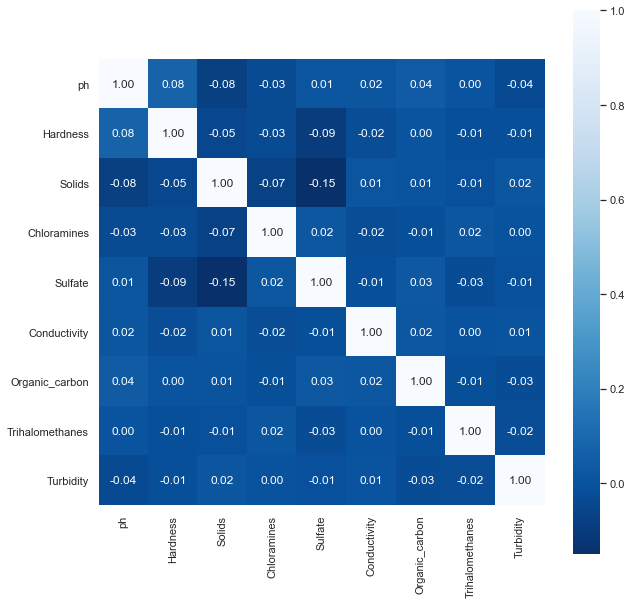

In [229]:
# mediante una matriz de correlación verifico si hay columnas correlacionadas unas con otras

fig=plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap = 'Blues_r', fmt='0.2f', square=True)

no existe correlacion, no se puede pensar en una regresión lineal

# ahora si a implementar el algoritmo de prediccion si el agua es potable o no

voy a probar con varios clasificadores y el que tenga mejor accuracy ese sera el modelo que voy a utilizar

# ya que los datos tienen gran diversidad voy a implementar un ensamblador que se llama bagging para hacer que el modelo funcione mejor.


# bagging

es como si le preguntaramos a un experto de que nos combiene mejor para nuestro algoritmo parte en diferentes partes el dataset en mediante una especie de votacion toma desiciones que mejor convengan al algoritmo, estas partes del dataset pueden ser entrenadas por el mismo o diferentes modelos

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
# divido los datos de entrenamiento y prueba del modelo
X = data.drop(['Potability'], axis=1)
y = data['Potability']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [232]:
# importo los modelos de clasificación

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [233]:
estimators = {
       'LogisticRegression' : LogisticRegression(),
        'SGD' : SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
        'KNN' : KNeighborsClassifier(),
        'DecisionTreeClf' : DecisionTreeClassifier(),
        'RandomTreeForest' : RandomForestClassifier(random_state=0),
        'GradientBoostingClassifier' : GradientBoostingClassifier()
    }

for name, estimator in estimators.items():
    bag_class = BaggingClassifier(base_estimator = estimator, n_estimators=50).fit(X_train, y_train)
    bag_predict = bag_class.predict(X_test)
    print('='*64)
    print('SCORE Bagging with {} : {}'.format(name, accuracy_score(bag_predict, y_test)))

SCORE Bagging with LogisticRegression : 0.6227106227106227
SCORE Bagging with SGD : 0.6227106227106227
SCORE Bagging with KNN : 0.5409035409035409
SCORE Bagging with DecisionTreeClf : 0.7924297924297924
SCORE Bagging with RandomTreeForest : 0.800976800976801
SCORE Bagging with GradientBoostingClassifier : 0.7924297924297924


el modelo que mejor predice si el agua es potable o no es RandomTreeForest este es un algoritmo que une varios
arboles de decisión para predecir un evento, entonces este es el que utilzo para hacer las predicciones.

In [234]:
# defino por aparte algoritmo de bosque aleatorio

Random_Tree_Forest = RandomForestClassifier(random_state=0).fit(X_train, y_train)
bagging_class = BaggingClassifier(base_estimator = Random_Tree_Forest, n_estimators=50).fit(X_train, y_train)
bagging_predict = bagging_class.predict(X_test)
print('')
print('SCORE Random Tree Forest with bagging {} '.format(accuracy_score(bagging_predict, y_test)))


SCORE Random Tree Forest with bagging 0.8046398046398047 


# luego escogo del dataset 50 datos al azar para hacer predicciones y probar el algoritmo sin los datos de test

In [247]:
values = data.sample(50)

In [248]:
values.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
942,6.848805,204.812711,20555.559572,9.775004,387.686388,389.638228,12.298753,49.452046,3.130045,0
3186,8.316664,110.903598,24814.485805,9.489566,332.566990,480.472306,14.271247,77.854499,2.695800,1
2040,7.073783,255.953599,15097.024064,8.482421,361.971419,471.477419,14.570932,40.287298,3.227941,1
1675,7.085378,193.167611,20894.400493,7.331568,359.426537,417.424766,16.787145,38.107005,3.818404,0
2172,7.950817,147.117918,20827.917578,9.226125,334.564290,474.854039,10.714241,60.255519,4.543685,0


In [249]:
predictions = values.drop(['Potability'],axis = 1)
target = values[['Potability']]

In [250]:
new_predict = bagging_class.predict(predictions)

In [254]:
new_predict

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1])

# ahora con una matriz de confusión verifico en que acerto y en que fallo el algoritmo

<AxesSubplot:>

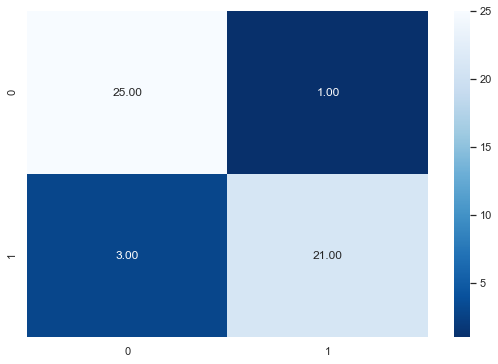

In [256]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(new_predict, target), annot=True, cmap = 'Blues_r', fmt='.2f')

# como se lee una matriz de confusión?

los numeros que aparecen en la matriz de confusión sin las comparaciones de los datos de y_test y los datos predecidos 

1 --> significa bueno para humanos es decir es agua potable

0 --> significa que no es bueno para humanos es decir no es agua potable

la mejor manera de leer una matriz de confusión es leerla de manera diagonal de derecha a izquierda, es este caso
la matriz es de 2x2 ya que solo tiene dos etiquetas son son 0 y 1, las predicciónes son comparadas con la variable
target de los datos aleatorios que escogimos del dataset.

en el cuadro azul claro de la parte superior izquierda significa que el algoritmo realizo 25 predicciónes acertadas
prediciendo que el agua no es potable es decir fueron predicciónes verdaderas positivas siendo 0.

en el cuadro azul menos claro de la parte inferior derecha significa que el algoritmo realizo 21 predicciónes acertadas
prediciendo que el agua es potable es decir predicciónes verdaderas negativas siendo 1.

en el cuadro azul no tan claro de la parte inferior izquierda fueron 3 predicciónes erroneas prediciendo que el agua
es potable siendo 0, la predicción es errada por que el el target es 1 agua potable, es decir falsa positiva. 

y en el cuadro azul mas oscuro el algoritmo realizo 1 prediccion errada prediciendo que el agua es potable siendo 1
la predicción es errada por que el el target es 0 agua no potable, es decir falsa negativa.